In [1]:
import pandas as pd

data = pd.read_csv('Amazon-Products.csv')

data.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [2]:
# describe data
data.describe()

# if describe() is not showing typical statistical measures, e.g. median, mean, min, max
# the dataset is containing mostly categorical or non-numerical data

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


In [3]:
data.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [5]:
# identify missing values 

missing_values = data.isnull().sum()

# display col with missing values
print(missing_values[missing_values > 0])

print('----------------------------')

# display % of missing values for each col
missing_percentage = (missing_values / len(data)) * 100

print(missing_percentage[missing_percentage > 0])

ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64
----------------------------
ratings           31.870700
no_of_ratings     31.870700
discount_price    11.088590
actual_price       3.229421
dtype: float64


before deailing with missing values, theres a need to analyze the distribution of numerical column

Filling missing values is chosen over removing them to preserve data integrity and prevent loss of important information.
Mean imputation is used for normally distributed numerical data without outliers.
Median imputation is used for skewed numerical data with outliers.
Mode imputation is used for categorical data to ensure valid category values.

In [6]:
# while drawing distribution, we hit TypeError: Horizontal orientation requires numeric `x` variable.
# this occur in `no_of_ratings` col, that means there exist non-empty value that are not numeric

# list of columns to analyse
columns_to_analyse = ['ratings', 'no_of_ratings','discount_price','actual_price']

# func to indentify non-numeric values in a column
def find_non_numeric(df, col):
    # df[column].notna() returns a boolean series indicating non-NaN values
    # pd.to_numeric(df[column], errors='coerce') converts the column to numeric values, setting non-numeric values to NaN
    # isna() returns a boolean series indicating NaN values
    # Combining these two conditions, we get non-numeric values that are not NaNs
    non_numeric_values = df[col][df[col].notna() & pd.to_numeric(df[col], errors='coerce').isna()]
    return non_numeric_values

# check for non-numeric in each of the col
for col in columns_to_analyse:
    non_numeric = find_non_numeric(data, col)
    if not non_numeric.empty:
        print(f'Non-numeric values found in {col}:')
        print(non_numeric)

Non-numeric values found in ratings:
437       Get
473       Get
474       Get
475       Get
488       Get
         ... 
551502    Get
551504    Get
551541    Get
551550    Get
551551    Get
Name: ratings, Length: 6233, dtype: object
Non-numeric values found in no_of_ratings:
0                           2,255
1                           2,948
2                           1,206
5                           1,666
6                           1,097
                   ...           
551502    FREE Delivery by Amazon
551504    FREE Delivery by Amazon
551541    FREE Delivery by Amazon
551550    FREE Delivery by Amazon
551551    FREE Delivery by Amazon
Name: no_of_ratings, Length: 36762, dtype: object
Non-numeric values found in discount_price:
0         ₹32,999
1         ₹46,490
2         ₹34,490
3         ₹37,990
4         ₹34,490
           ...   
551579       ₹711
551580     ₹3,449
551581     ₹1,199
551582     ₹1,199
551584     ₹1,039
Name: discount_price, Length: 490422, dtype: object
Non-n

In [7]:
# count non-numeric values for each specific column

def count_non_numeric_and_percentage(df, col):
    non_numeric_values = find_non_numeric(df, col)
    count = non_numeric_values.shape[0]
    percentage = (count / len(df)) * 100
    return count, percentage

non_numeric_counts = {}
for col in columns_to_analyse:
    count, percentage = count_non_numeric_and_percentage(data, col)
    non_numeric_counts[col] = {'count': count, 'percentage': percentage}
    
# display
for col, val in non_numeric_counts.items():
    print(f"Column: {col}, Non-numeric count: {val['count']}, Percentage: {val['percentage']:.2f}%")

Column: ratings, Non-numeric count: 6233, Percentage: 1.13%
Column: no_of_ratings, Non-numeric count: 36762, Percentage: 6.66%
Column: discount_price, Non-numeric count: 490422, Percentage: 88.91%
Column: actual_price, Non-numeric count: 533772, Percentage: 96.77%


By observation, non-numeric percentage of discount_price & actual_price are 88.91% and 96.77% respectively. NA percentage of discount_price & actual_price are 11.088590 and 3.229421.

Since they compensate together as about 100%, we can say that discount_price & actual_price are either numeric values in string format or NA. Hence, to help in imputing NA values, and plotting distribution diagram, we will convert the price columns by removing currency symbol and commas from the price column, and convert them into numeric values


In [8]:
import re

def convert_price_column(df, col):
    # remove currency symbols and comma
    df[col] = df[col].apply(lambda x:re.sub(r'[₹,]', '', str(x)))
    # convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
for col in ['discount_price', 'actual_price', 'no_of_ratings']:
    convert_price_column(data, col)
    
print(data[['discount_price', 'actual_price','no_of_ratings']].info())
data[['discount_price', 'actual_price','no_of_ratings']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   discount_price  490422 non-null  float64
 1   actual_price    533772 non-null  float64
 2   no_of_ratings   369558 non-null  float64
dtypes: float64(3)
memory usage: 12.6 MB
None


,discount_price,actual_price,no_of_ratings
0,32999.0,58990.0,2255.0
1,46490.0,75990.0,2948.0
2,34490.0,61990.0,1206.0
3,37990.0,68990.0,69.0
4,34490.0,67790.0,630.0


In [9]:
# check again for non-numeric 

for col in columns_to_analyse:
    non_numeric = find_non_numeric(data, col)
    if not non_numeric.empty:
        print(f'Non-numeric values found in {col}:')
        print(non_numeric)

Non-numeric values found in ratings:
437       Get
473       Get
474       Get
475       Get
488       Get
         ... 
551502    Get
551504    Get
551541    Get
551550    Get
551551    Get
Name: ratings, Length: 6233, dtype: object


For this, since the non-nummeric values are seemingly meaningless, I will just replaced them with NaN

In [10]:
def fill_non_numeric_with_na(df, col):
    non_numeric_values = df[col][df[col].notna() & pd.to_numeric(df[col], errors='coerce').isna()]
    if not non_numeric_values.empty:
        # replace with NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
fill_non_numeric_with_na(data, 'ratings')

print(data[['ratings', 'no_of_ratings','actual_price', 'discount_price']].apply(lambda x: find_non_numeric(data, x.name)).sum())

ratings           0.0
no_of_ratings     0.0
actual_price      0.0
discount_price    0.0
dtype: float64


Done with non-numeric values. Continue with missing values.

In [11]:
# identify missing values 

missing_values = data.isnull().sum()

# display col with missing values
print(missing_values[missing_values > 0])

print('----------------------------')

# display % of missing values for each col
missing_percentage = (missing_values / len(data)) * 100
# :.2f}%"
print(missing_percentage[missing_percentage > 0])

ratings           182027
no_of_ratings     182027
discount_price     61163
actual_price       17813
dtype: int64
----------------------------
ratings           33.000716
no_of_ratings     33.000716
discount_price    11.088590
actual_price       3.229421
dtype: float64


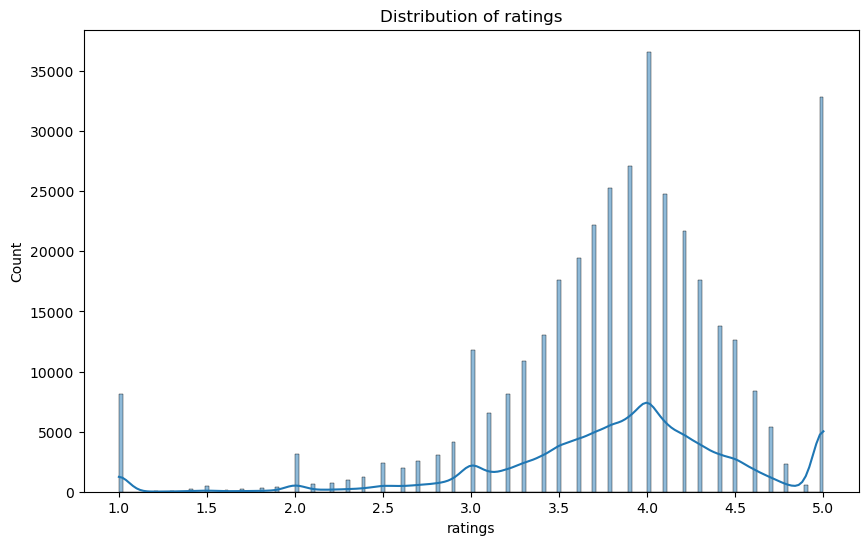

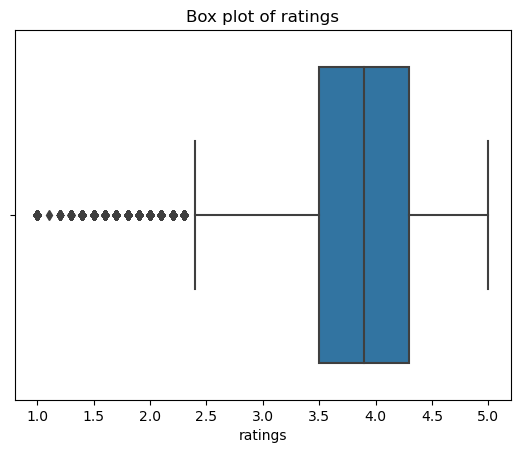

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# it can take time to plot multiple graph, start with ratings

# visualization for ratings

plt.figure(figsize = (10,6))
sns.histplot(data['ratings'], kde = True)
plt.title(f'Distribution of ratings')
plt.show()
    
sns.boxplot(x=data['ratings'])
plt.title(f'Box plot of ratings')
plt.show()

since from the box plot and the distribution curve, the data on ratings seems to be left skewed. We will use median imputation for missing value in ratings.

In [13]:
data[['no_of_ratings']]

ratings_null = pd.isnull(data['no_of_ratings'])
data[ratings_null]

print(data['no_of_ratings'].max(), data['no_of_ratings'].min())

589547.0 1.0


Since the huge difference and range make it hard to visualize, we will normalize the data.

Common transformation: Logarithmic Transformation

In [14]:
import numpy as np

data['log_no_of_ratings'] = np.log1p(data['no_of_ratings'])  # log1p is used to handle log(0)

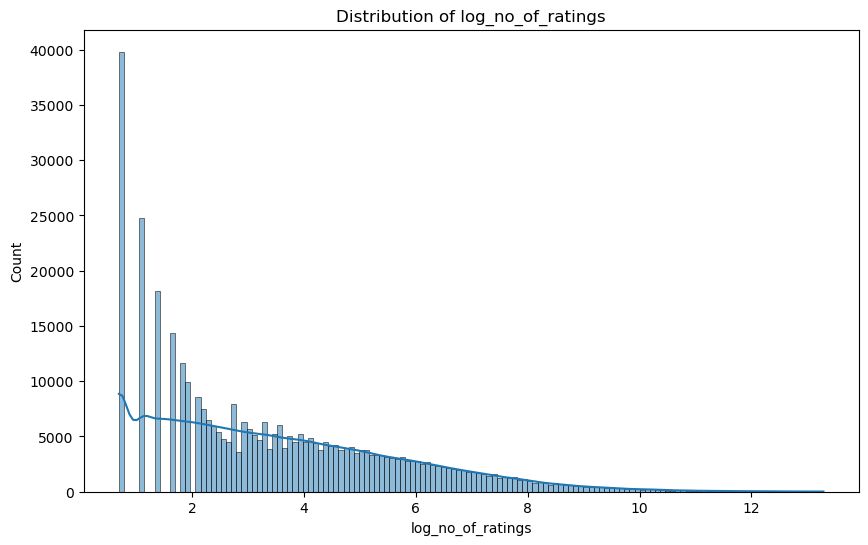

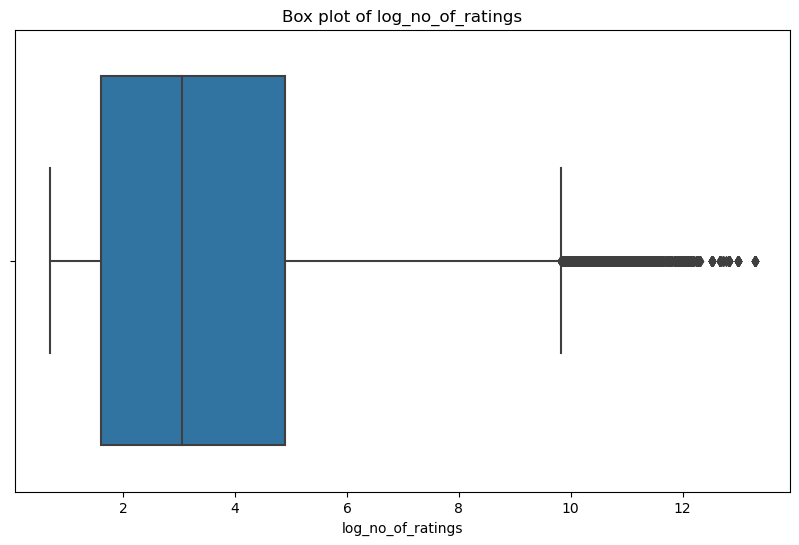

In [15]:
# visualization for log_no_of_ratings

plt.figure(figsize = (10,6))
sns.histplot(data['log_no_of_ratings'], kde=True)
plt.title(f'Distribution of log_no_of_ratings')
plt.show()
    
plt.figure(figsize = (10,6))
sns.boxplot(x=data['log_no_of_ratings'])
plt.title(f'Box plot of log_no_of_ratings')
plt.show()

no_of_ratings is right skewed, use median imputation

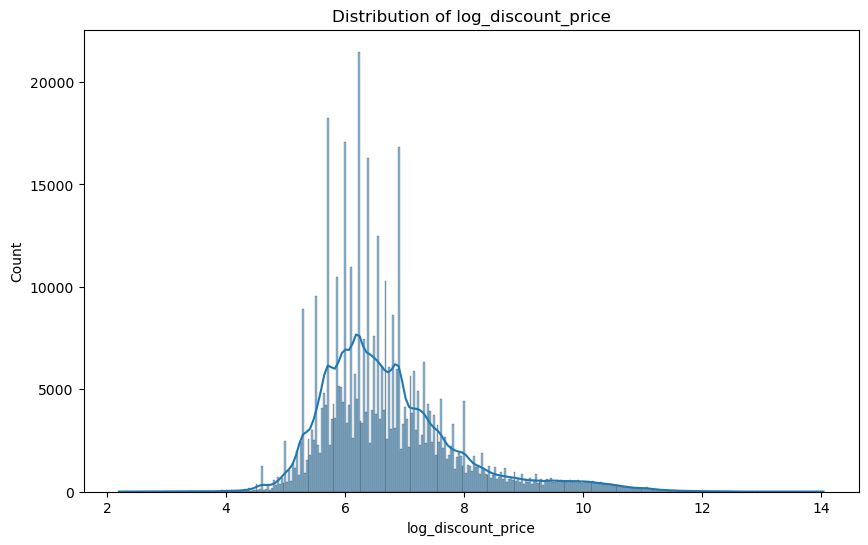

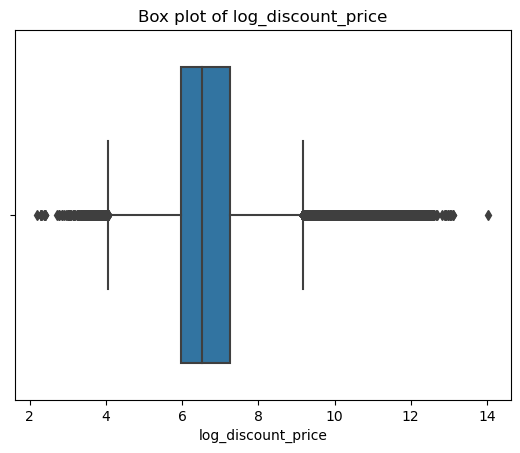

In [16]:
# visualization for discount_price

data['log_discount_price'] = np.log1p(data['discount_price'])

plt.figure(figsize = (10,6))
sns.histplot(data['log_discount_price'], kde = True)
plt.title(f'Distribution of log_discount_price')
plt.show()
    
sns.boxplot(x=data['log_discount_price'])
plt.title(f'Box plot of log_discount_price')
plt.show()

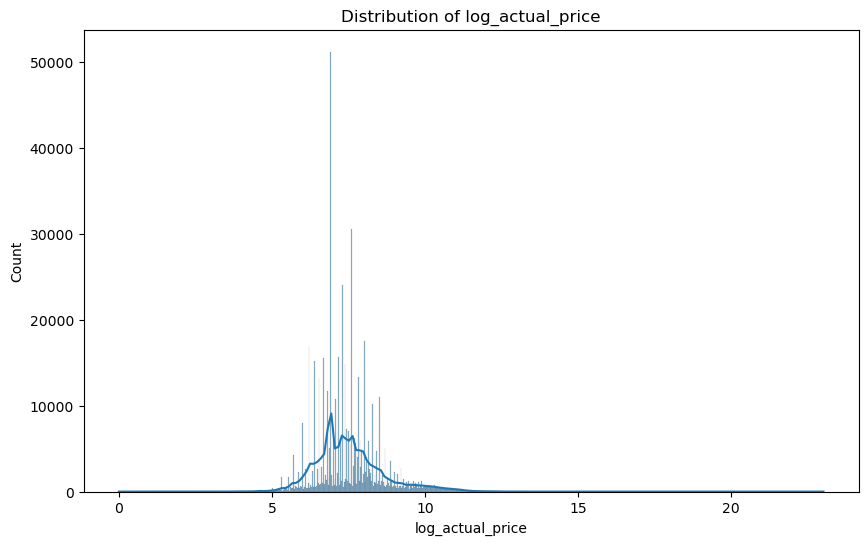

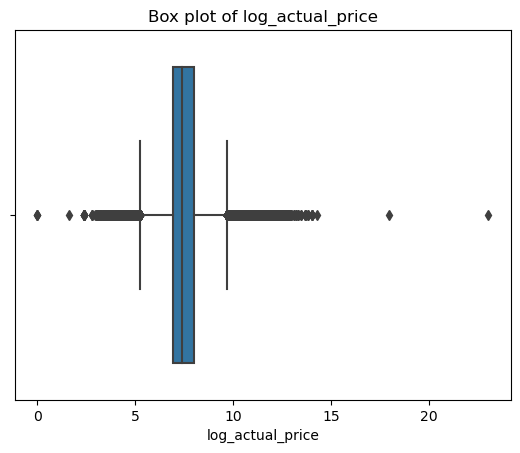

In [17]:
# visualization for actual_price

data['log_actual_price'] = np.log1p(data['actual_price'])

plt.figure(figsize = (10,6))
sns.histplot(data['log_actual_price'], kde = True)
plt.title(f'Distribution of log_actual_price')
plt.show()
    
sns.boxplot(x=data['log_actual_price'])
plt.title(f'Box plot of log_actual_price')
plt.show()

Will be using Median Imputation for all missing values 

In [18]:
for column in ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']:
    data[column].fillna(data[column].median(), inplace=True)

In [21]:
# verify that there are no more missing values in `columns_to_analyse`

print(data[columns_to_analyse].isnull().sum().sum())

0


In [23]:
print(data.duplicated().sum())

# drop duplicate rows 
# data.drop_duplicates(inplace=True)

0


In [25]:
# scale numeric features (ratings for collaborative filtering)

from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()

data['ratings'] = scaler.fit_transform(data[['ratings']])

data['ratings'].head()

0    0.557279
1    0.557279
2    0.557279
3    0.234547
4    0.395913
Name: ratings, dtype: float64

In [26]:
# identify non-string values in a column
def find_non_string_values(df, column):
    non_string_values = df[column][~df[column].apply(lambda x: isinstance(x, str))]
    return non_string_values

# Check for non-string values in 'main_category' and 'sub_category'
non_string_main_category = find_non_string_values(data, 'main_category')
non_string_sub_category = find_non_string_values(data, 'sub_category')

print(f"Non-string values in 'main_category':\n{non_string_main_category}\n")
print(f"Non-string values in 'sub_category':\n{non_string_sub_category}\n")


Non-string values in 'main_category':
Series([], Name: main_category, dtype: object)

Non-string values in 'sub_category':
Series([], Name: sub_category, dtype: object)



In [28]:
# categorical encoding 

# use TF-IDF Vectorization for text features 
# or
# One-Hot Encoding for categorical features.

from sklearn.preprocessing import OneHotEncoder

# one-hot encoding for main_category & sub_category
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[['main_category', 'sub_category']])

# create a df with the encoded features
encoded_df = pd.DataFrame(
    encoded_features, 
    columns=encoder.get_feature_names_out(['main_category', 'sub_category'])
)

# concatenate the encoded features with the original data
data = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns
data.drop(['main_category', 'sub_category'], axis=1, inplace=True)

data.head()

/Users/sanny/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,name,image,link,ratings,no_of_ratings,discount_price,actual_price,log_no_of_ratings,log_discount_price,...,sub_category_Toys Gifting Store,sub_category_Travel Accessories,sub_category_Travel Duffles,sub_category_Value Bazaar,sub_category_Wallets,sub_category_Washing Machines,sub_category_Watches,sub_category_Western Wear,sub_category_Women's Fashion,sub_category_Yoga
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,0.557279,2255.0,32999.0,58990.0,7.721349,10.404263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,0.557279,2948.0,46490.0,75990.0,7.989221,10.747014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,0.557279,1206.0,34490.0,61990.0,7.095893,10.448454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,0.234547,69.0,37990.0,68990.0,4.248495,10.545105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,0.395913,630.0,34490.0,67790.0,6.447306,10.448454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data = data.rename(columns={'Unnamed: 0':'index'})

In [36]:
# List of columns to keep for content-based and collaborative filtering

columns_to_keep = ['index', 'name', 'ratings'] + list(encoded_df.columns)

# Drop irrelevant columns
data = data[columns_to_keep]

# Verify the DataFrame after dropping irrelevant columns
print(data.head())
print(data.columns)


   index                                               name   ratings  \
0      0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...  0.557279   
1      1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...  0.557279   
2      2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...  0.557279   
3      3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...  0.234547   
4      4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...  0.395913   

   main_category_accessories  main_category_accessories  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   main_category_appliances  main_category_appliances  \
0                       1.0                       1.0   
1                       1.0                       1.0   
2                       1.0        

In [37]:
# use TF-IDF vectorization 
# to transform the name column into a format suitable for computing similarities

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the 'name' column
tfidf_matrix = tfidf_vectorizer.fit_transform(data['name'])

# Verify the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


(551585, 165656)


In [38]:
# combine TF-IDF with encoded main_category and sub_category
import scipy.sparse as sp

# Combine TF-IDF matrix with encoded categorical features
encoded_columns = [col for col in data.columns if col.startswith('main_category_') or col.startswith('sub_category_')]
encoded_matrix = data[encoded_columns].values

# Stack the TF-IDF matrix and the encoded matrix horizontally
combined_matrix = sp.hstack([tfidf_matrix, encoded_matrix], format='csr')

# Verify the shape of the combined matrix
print(combined_matrix.shape)

(551585, 166184)


In [ ]:
# compute the cosine similarity for content-based filtering 
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(combined_matrix, combined_matrix)

# Function to get content-based recommendations
def get_content_based_recommendations(item_index, num_recommendations=5):
    sim_scores = list(enumerate(cosine_sim[item_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    item_indices = [i[0] for i in sim_scores]
    return data.iloc[item_indices]

# Example usage
print(get_content_based_recommendations(0))


In [ ]:
from scipy.sparse.linalg import svds
import numpy as np

# Create a user-item matrix
user_item_matrix = data.pivot(index='user_id', columns='item_id', values='ratings').fillna(0)

# Perform SVD
U, sigma, Vt = svds(user_item_matrix, k=50)

# Convert sigma to a diagonal matrix
sigma = np.diag(sigma)

# Reconstruct the ratings matrix
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Create a DataFrame for the predicted ratings
predicted_ratings = pd.DataFrame(all_user_predicted_ratings, columns=user_item_matrix.columns)

# Function to get collaborative filtering recommendations
def get_collaborative_recommendations(user_id, num_recommendations=5):
    user_row_number = user_item_matrix.index.get_loc(user_id)
    sorted_user_predictions = predicted_ratings.iloc[user_row_number].sort_values(ascending=False)
    recommended_items = sorted_user_predictions.head(num_recommendations).index
    return data[data['item_id'].isin(recommended_items)]

# Example usage
print(get_collaborative_recommendations(user_id=1))
